In [59]:
#Load libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tysserand import tysserand as ty
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 
from PIL import Image, ImageOps
import fcsparser

#set up working dir

data_dir = Path("/home/mouneem/tysserand/data/")
path = str("/home/mouneem/Projects/tysserand/tysserand/Imagin_LungPredict/")
path = str("/home/mouneem/tysserand/data/")


In [60]:
# FCS TO CSV
fileimg = "image18.png"
"""

FCSfile = 'NVA_21-003.IMMCORE.C1v1_15T008187-08-ImvessC1-4518.czi_79677_ObjData.fcs'
meta, data = fcsparser.parse(path+"fcs/"+FCSfile, reformat_meta=True)
type(data)
#df1 = df[['a', 'b']] // df1 = df.iloc[:, 0:2] 

data["x"] = (data["XMax"] + data["XMin"] ) / 2
data["y"] = (data["YMax"] + data["YMin"] ) / 2

col_is_marker = []
for col in list(data.columns):
    if col.count('+') + col.count('-') > 1:
        col_is_marker.append(True)
    else:
        col_is_marker.append(False)

print(len(col_is_marker))

marker = data.loc[:, col_is_marker]

classes = marker.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data["class"] = pd.factorize(classes)[0] 

nodes = data[['x','y',"class"]]
nodes.to_csv(path + "csv/"+FCSfile )
"""

nodes = pd.read_csv(path+'image19.csv')  
nodes.head()


,,Area,X,Y,class
0,1,358,411.246,13.263,0
1,2,6,471.000,1.500,0
2,3,1,475.500,1.500,0
3,4,2,537.000,1.500,0
4,5,1,542.500,1.500,0


In [61]:
ratio = 1
nodes = nodes.sample(n = round(len(nodes) / ratio) )
coords = nodes.loc[:,['X','Y']].values

print('nodes:', len(nodes))
print('coords:', len(coords))

#load image
img = plt.imread(data_dir / fileimg)
#img = ImageOps.grayscale(img) # GRAYSCALE IMAGE


nodes: 244
coords: 244


In [62]:
#make colors
class_colors = ['#F85446', '#813FE0', '#52DEF7', '#62E03F', '#FFCE36', '#FA6C17','#D805E3', '#0155FA', '#0BE35B', '#FFF117', '#DDFF7D', '#78E3C8']
classes = list(nodes['class'].unique())
print(classes)

dico_col = {}
for i in range(len(classes)):
    marker = classes[i]
    dico_col[marker] = class_colors[i]


colors = []
for cl in nodes['class']:
    colors.append(dico_col[cl])


[0]


In [63]:
# Adjust size of image  

# nodes
min_x = min(coords[:, 0])
max_x = max(coords[:, 0])
nodes_width = max_x - min_x   

min_y = min(coords[:, 1])
max_y = max(coords[:, 1])
nodes_height = max_y - min_y   

# img
img_width = img.shape[0]
img_height = img.shape[1]

ratio_x = img_width / nodes_width
ratio_y = img_height / nodes_height
ratio = 1
print('ratio x', ratio_x, ' \n'
        'ratio y', ratio_y)

#img = cv2.flip(img, 0)
coords[:,0]  = (coords[:,0] * ratio_x ).round()
coords[:,1]  = (coords[:,1] * ratio_x).round()
print('scaled UP')

## TANSITION TO 0
coords[:,0] = coords[:,0] - min(coords[:,0])
coords[:,1] = coords[:,1] - min(coords[:,1])


"\n# nodes\nmin_x = min(coords[:, 0])\nmax_x = max(coords[:, 0])\nnodes_width = max_x - min_x   \n\nmin_y = min(coords[:, 1])\nmax_y = max(coords[:, 1])\nnodes_height = max_y - min_y   \n\n# img\nimg_width = img.shape[0]\nimg_height = img.shape[1]\n\nratio_x = img_width / nodes_width\nratio_y = img_height / nodes_height\nratio = 1\nprint('ratio x', ratio_x, ' \n'\n        'ratio y', ratio_y)\n\n#img = cv2.flip(img, 0)\ncoords[:,0]  = (coords[:,0] * ratio_x ).round()\ncoords[:,1]  = (coords[:,1] * ratio_x).round()\nprint('scaled UP')\n\n## TANSITION TO 0\ncoords[:,0] = coords[:,0] - min(coords[:,0])\ncoords[:,1] = coords[:,1] - min(coords[:,1])\n"

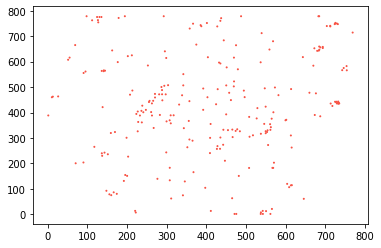

In [64]:
plt.scatter(coords[:,0] , coords[:,1] , c=colors,  zorder=10, s = 1)

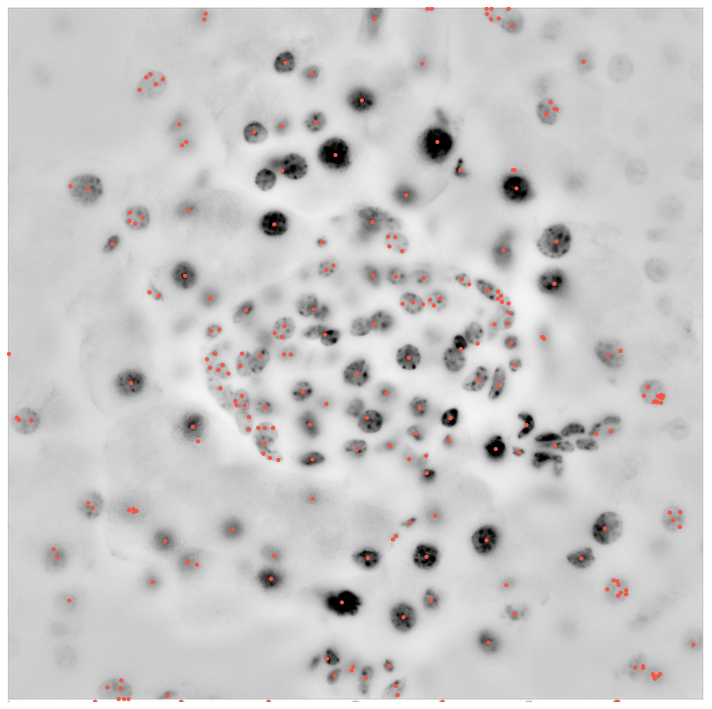

In [65]:

fig, ax = ty.showim(img, figsize=(10, 10))
col_nodes = colors
ax.scatter(coords[:,0] , coords[:,1], s = 10 , c=col_nodes,  zorder=10)

# TYSSERAND

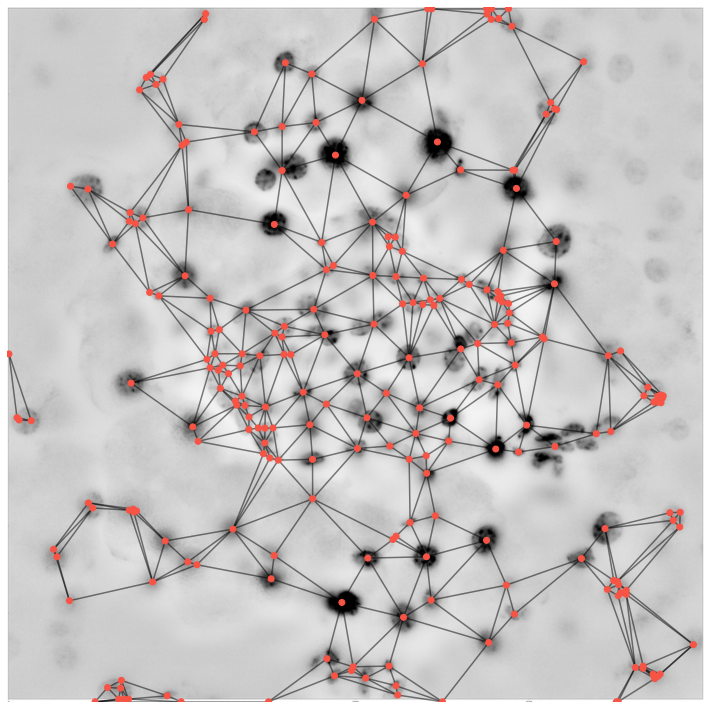

In [66]:
# superimpose network to mIF image

fig, ax = ty.showim(img, figsize=(10, 10))

pairs = ty.build_delaunay(coords)
#distances = ty.distance_neighbors(coords, pairs)
    
ty.plot_network(coords, pairs, col_nodes=colors, col_edges='k', ax=ax)